In [ ]:
"""Code snippets have been referenced from https://www.datacamp.com/community/tutorials/scikit-learn-fake-news"""

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer


In [2]:
import itertools

In [3]:
from matplotlib import pyplot as plt


In [4]:

df = pd.read_csv("fakeallclean.csv",encoding='UTF-8')
    
# checking the head of dataframe
df.head()

,Unnamed: 0,X,text,label
0,1,1,Muslims BUSTED They Stole Millions In Govt Ben...,TRUE
1,2,2,Re Why Did Attorney General Loretta Lynch Plea...,TRUE
2,3,3,BREAKING Weiner Cooperating With FBI On Hillar...,TRUE
3,4,4,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,TRUE
4,5,5,FANTASTIC TRUMP'S 7 POINT PLAN To Reform Healt...,TRUE


In [5]:
# shape of df
df.shape

(892, 4)

In [6]:
df = df.set_index("Unnamed: 0")
df.head()

,X,text,label
Unnamed: 0,,,
1,1,Muslims BUSTED They Stole Millions In Govt Ben...,TRUE
2,2,Re Why Did Attorney General Loretta Lynch Plea...,TRUE
3,3,BREAKING Weiner Cooperating With FBI On Hillar...,TRUE
4,4,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,TRUE
5,5,FANTASTIC TRUMP'S 7 POINT PLAN To Reform Healt...,TRUE


In [7]:
df.columns = ["id","text","label"]

In [8]:
df.label.shape

(892,)

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tejeshbatapati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Set `y` 
y = df.label 

# Drop the `label` column
df.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['text'].values.astype('U'), y, test_size=0.20, random_state=53)

In [11]:

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [12]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [13]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['young', 'youre', 'youtube', 'yr', 'zero', 'zika', 'zings', 'zionist', 'zombies', 'zone']
['05', '05pc', '10', '100', '100percentfedupcom', '10k', '11', '113', '1131', '12']


In [14]:
print(tfidf_vectorizer.get_feature_names()[-10:])

['young', 'youre', 'youtube', 'yr', 'zero', 'zika', 'zings', 'zionist', 'zombies', 'zone']


In [15]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [16]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [17]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [18]:
print(count_df.equals(tfidf_df))

False


In [19]:
count_df.head()

,05,05pc,10,100,100percentfedupcom,10k,11,113,1131,12,...,young,youre,youtube,yr,zero,zika,zings,zionist,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
tfidf_df.head()

,05,05pc,10,100,100percentfedupcom,10k,11,113,1131,12,...,young,youre,youtube,yr,zero,zika,zings,zionist,zombies,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [23]:
clf = MultinomialNB() 

accuracy:   0.698
Confusion matrix, without normalization


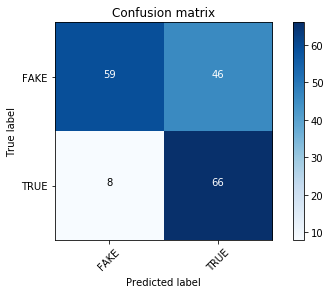

In [24]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

In [25]:
clf = MultinomialNB() 

accuracy:   0.715
Confusion matrix, without normalization


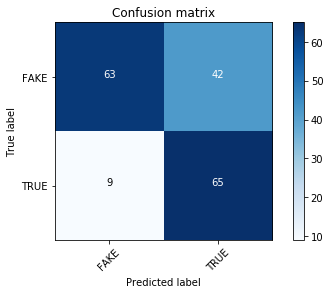

In [26]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [28]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.771
Confusion matrix, without normalization


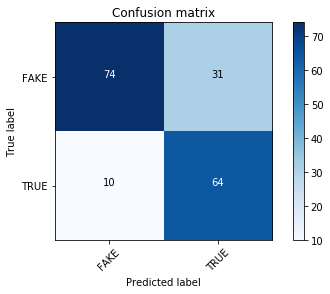

In [29]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

In [30]:
clf = MultinomialNB(alpha=0.1)

In [31]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.72067
Alpha: 0.10 Score: 0.70950
Alpha: 0.20 Score: 0.69832
Alpha: 0.30 Score: 0.69274
Alpha: 0.40 Score: 0.69832
Alpha: 0.50 Score: 0.69274
Alpha: 0.60 Score: 0.70391
Alpha: 0.70 Score: 0.69832
Alpha: 0.80 Score: 0.69832
Alpha: 0.90 Score: 0.69832


/Users/tejeshbatapati/anaconda3/lib/python3.5/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [32]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -2.740139128962982 indicted
FAKE -2.243677173984195 wikileaks
FAKE -1.96138041458667 comment
FAKE -1.769434476197284 reopens
FAKE -1.7053585223080971 elected
FAKE -1.6531454608730267 flipped
FAKE -1.433431295507709 share
FAKE -1.425759662766732 protesting
FAKE -1.425759662766732 rapist
FAKE -1.3758944598313871 probe
FAKE -1.3561184399969919 exclusive
FAKE -1.3205454475873808 war
FAKE -1.3195495720780983 rigged
FAKE -1.3121530017863403 declared
FAKE -1.301533222022235 loves
FAKE -1.2900483094872819 dangerous
FAKE -1.2808694630403894 official
FAKE -1.2640108573311806 mystery
FAKE -1.2285256298348872 jail
FAKE -1.2210493708555576 daesh
FAKE -1.2210493708555576 founding
FAKE -1.1961881028161565 voting
FAKE -1.1709441543968788 congressman
FAKE -1.1507668239987916 hillary
FAKE -1.1507298924101352 premiums
FAKE -1.148224862539915 philippines
FAKE -1.1294927301121591 programmed
FAKE -1.1198042055102724 central
FAKE -1.107174071938231 person
FAKE -1.1070816295487402 tweets

TRUE 2.48542667

In [33]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

/Users/tejeshbatapati/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/tejeshbatapati/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/tejeshbatapati/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [34]:
clf = MultinomialNB(alpha=.90)

accuracy:   0.698
Confusion matrix, without normalization


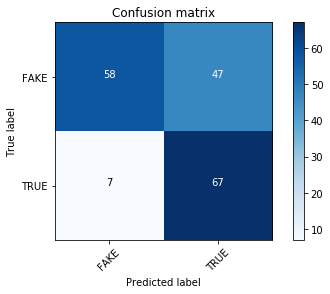

In [35]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

In [36]:
clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.760
Confusion matrix, without normalization


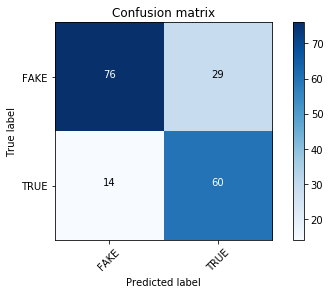

In [37]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'TRUE'])
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

In [46]:
df_a = pd.read_csv("awetest1.csv")
df_a = df_a[0:10]
df_a = df_a.set_index("X")
y_a = df_a.label 

# Drop the `label` column
df_a.drop("label", axis=1)

# Make training and test sets 
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(df_a['title'], y_a, test_size=0,random_state=1)
test_me = hash_vectorizer.transform(X_train_a)
pred = clf.predict(test_me)
score = accuracy_score(y_train_a, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.400


/Users/tejeshbatapati/anaconda3/lib/python3.5/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [45]:
pred

array(['TRUE', 'TRUE', 'TRUE', 'TRUE', 'FAKE', 'TRUE', 'TRUE', 'FAKE',
       'FAKE', 'TRUE'], dtype='<U4')

In [47]:
X_train_a

X
3     My mom took that picture in August when we wer...
10    Ford Motor CEO Says Trump Is Lying AGAIN! Comp...
7     State Of Minnesota Has Just Handed Over FULL C...
5     BREAKING: Barrels Removed From Clinton Propert...
1     What happens when you give 4chan Pictures of t...
4     A picture someone took of a shark swimming by ...
2     New photo of what seems to be Boston bombing s...
8     KISS' Gene Simmons: "You Want to Win the War o...
9     Kerry says Syrian diplomacy at impasse after t...
6     BREAKING: Johnny Depp Taken Into Custody By Se...
Name: title, dtype: object